In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import itertools
import pickle

## Get data from Datacamp's S3 bucket

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
print(df.shape)
print("Number of fakes: ",df[df['label'].str.contains("FAKE")].shape[0])
df.head()

(6335, 4)
('Number of fakes: ', 3164)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


For now, only text is used as a feature until title is explored differently

In [3]:
# Do a 80-20 split of data into train and test sets. 
df = df[['title','text','label']]
trainX, testX, trainY, testY = train_test_split(df['text'], df['label'], test_size = 0.20, random_state=44)

In [4]:
# Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
train_tfidf = tfidf_vectorizer.fit_transform(trainX)
test_tfidf = tfidf_vectorizer.transform(testX)

In [5]:
#only need to do this once
f = open("tfidf_vectorizer.pckl",'wb')
pickle.dump(tfidf_vectorizer,f)
f.close()

In [6]:
#tfidf_vectorizer.get_feature_names()[-10:]
tfidf_df = pd.DataFrame(train_tfidf.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,000000031,000035,0001,0002,000billion,000ft,000km,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Passive Aggressive model 
Linear and takes less time

In [8]:
linear_clf = PassiveAggressiveClassifier(max_iter=50, verbose=1, n_jobs=-1)

In [9]:
linear_clf.fit(train_tfidf, trainY)
pred = linear_clf.predict(test_tfidf)
score = metrics.accuracy_score(testY, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(testY, pred, labels=['FAKE', 'REAL'])

-- Epoch 1
Norm: 38.69, NNZs: 47554, Bias: -0.569804, T: 5042, Avg. loss: 0.317904
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.23, NNZs: 48578, Bias: -0.541928, T: 10084, Avg. loss: 0.075330
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 47.05, NNZs: 49010, Bias: -0.523199, T: 15126, Avg. loss: 0.033776
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 48.36, NNZs: 49061, Bias: -0.516418, T: 20168, Avg. loss: 0.016232
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 48.96, NNZs: 49069, Bias: -0.513706, T: 25210, Avg. loss: 0.008656
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 49.23, NNZs: 49069, Bias: -0.517531, T: 30252, Avg. loss: 0.005164
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 49.36, NNZs: 49069, Bias: -0.516788, T: 35294, Avg. loss: 0.003760
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 49.41, NNZs: 49069, Bias: -0.516525, T: 40336, Avg. loss: 0.003049
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 49.44, NNZs: 49069, Bias: -0.516

Confusion matrix, without normalization


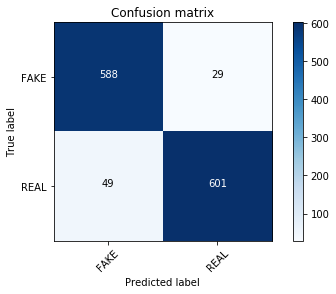

In [10]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
f = open('PAC_model.pckl', 'wb')
pickle.dump(linear_clf, f)
f.close()

### Multinomial NB model 

In [13]:
clf = MultinomialNB()

NameError: name 'MultinomialNB' is not defined

In [ ]:
train_tfidf[:100].shape

In [ ]:
clf.fit(train_tfidf[:100], trainY[:100])
pred = clf.predict(test_tfidf)
print("Accuracy: ", sklearn.metrics.accuracy_score(testY, pred))

cm = sklearn.metrics.confusion_matrix(testY, pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

## GBQ stuff that we might not need anymore

In [ ]:
sampleDF.to_gbq('FakeNews.SampleTable','vu-nlp',verbose=True)

In [ ]:
def load_sample():
  q = bqd.Query(sql='''
    SELECT
      title
    FROM
      `vu-nlp.FakeNews.FAKENEWS` 
  WHERE
    country = 'US'
    and language ='english'
  LIMIT 10
  ''')
  
  print("Executing BigQuery query...")
  return(q.execute().result().to_dataframe())

sampleDF = load_sample()
sampleDF